#Exploring Activation Functions in Deep Learning
## Objective:
Implement different activation functions (Sigmoid, Tanh, ReLU) in a single neural network and
compare their performance on a basic image classification task (e.g., MNIST handwritten digits)

##Downloading necessary library

In [ ]:
!pip install tensorflow

## Load and preprocess the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"Number of images in the training set: {x_train.shape[0]}")
print(f"Number of images in the test set: {x_test.shape[0]}")

Number of images in the training set: 60000
Number of images in the test set: 10000


## Function to Create and train  neural network

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def ct_model(activation_function):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation_function),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1, validation_data=(x_test, y_test))
    return model

## Train model with different activation functions

##**Sigmoid**

In [ ]:
model_sigmoid = ct_model('sigmoid')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7836 - loss: 0.9363 - val_accuracy: 0.9172 - val_loss: 0.3014
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9187 - loss: 0.2921 - val_accuracy: 0.9348 - val_loss: 0.2312
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9390 - loss: 0.2180 - val_accuracy: 0.9441 - val_loss: 0.1966
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9487 - loss: 0.1831 - val_accuracy: 0.9490 - val_loss: 0.1701
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9553 - loss: 0.1609 - val_accuracy: 0.9554 - val_loss: 0.1543


##**Tanh**

In [ ]:
model_tanh = ct_model('tanh')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8288 - loss: 0.6140 - val_accuracy: 0.9346 - val_loss: 0.2275
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9400 - loss: 0.2147 - val_accuracy: 0.9498 - val_loss: 0.1679
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9569 - loss: 0.1518 - val_accuracy: 0.9614 - val_loss: 0.1342
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9665 - loss: 0.1190 - val_accuracy: 0.9642 - val_loss: 0.1152
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9732 - loss: 0.0956 - val_accuracy: 0.9683 - val_loss: 0.1024


##**Relu**

In [ ]:
model_relu = ct_model('relu')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8314 - loss: 0.6139 - val_accuracy: 0.9448 - val_loss: 0.1916
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9506 - loss: 0.1753 - val_accuracy: 0.9586 - val_loss: 0.1388
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9650 - loss: 0.1201 - val_accuracy: 0.9687 - val_loss: 0.1074
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9745 - loss: 0.0903 - val_accuracy: 0.9715 - val_loss: 0.0951
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9785 - loss: 0.0721 - val_accuracy: 0.9727 - val_loss: 0.0914


## Evaluate the model

In [ ]:
def evaluate_model(model):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy

In [ ]:
print("Accuracy of Sigmoid Model:",evaluate_model(model_sigmoid))
print("Accuracy of Tanh Model:",evaluate_model(model_tanh))
print("Accuracy of ReLU Model:",evaluate_model(model_relu))

Accuracy of Sigmoid Model: 0.9553999900817871
Accuracy of Tanh Model: 0.9682999849319458
Accuracy of ReLU Model: 0.9726999998092651


##Visualization of accuracy of different activation function

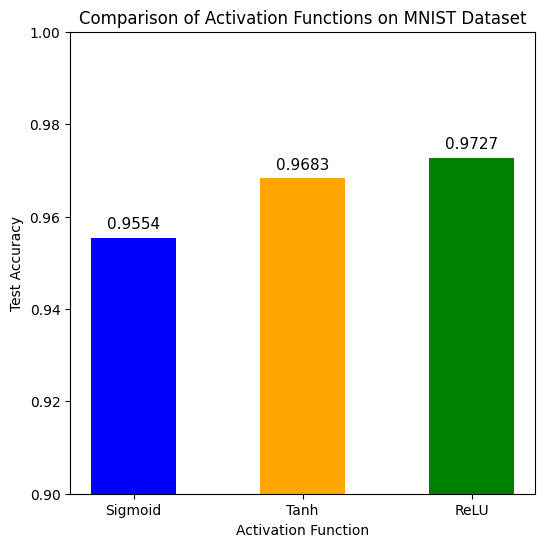

In [ ]:
models = ['Sigmoid', 'Tanh', 'ReLU']
accuracy_sigmoid = evaluate_model(model_sigmoid)
accuracy_tanh = evaluate_model(model_tanh)
accuracy_relu = evaluate_model(model_relu)
accuracies = [accuracy_sigmoid, accuracy_tanh, accuracy_relu]

plt.figure(figsize=(6, 6))
plt.bar(models, accuracies,color=['blue', 'orange', 'green'],width=0.5)
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Activation Functions on MNIST Dataset')
plt.ylim([0.9, 1.0])

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.002, f'{accuracies[i]:.4f}', ha='center', fontsize=11)
plt.show()

###ReLU acheived the highest accuracy with **97.27%**

## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


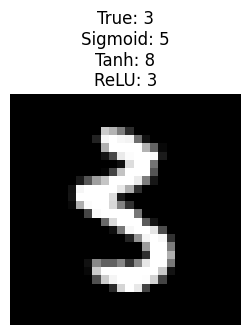

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_index = 507
image = x_test[image_index].reshape(1, 28, 28)

predicted_class_sigmoid = np.argmax(model_sigmoid.predict(image))
predicted_class_tanh = np.argmax(model_tanh.predict(image))
predicted_class_relu = np.argmax(model_relu.predict(image))

true_label = np.argmax(y_test[image_index])
plt.figure(figsize=(3, 3))
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f"True: {true_label}\n"
          f"Sigmoid: {predicted_class_sigmoid}\n"
          f"Tanh: {predicted_class_tanh}\n"
          f"ReLU: {predicted_class_relu}")
plt.show()

**The ReLU model correctly identified the true label (3), demonstrating the best performance among the three models, while the Sigmoid and Tanh models misclassified the image as 5 and 8, respectively, highlighting the ReLU model’s superior accuracy in this case.**

## **Conclusion**
*   ReLU Model:

Provides the highest accuracy (97.27%) and is generally preferred in deep networks due to its efficiency in training and learning.Generally provides better performance in practice due to faster training and better handling of gradients.
*   Tanh Model:

Better than sigmoid but less effective than ReLU in mitigating gradient issues and achieving higher accuracy.
*   Sigmoid Model:

Least effective in this context due to its limitations with gradient flow and slower convergence.

## For most modern neural networks, ReLU or its variants (like Leaky ReLU or Parametric ReLU) are preferred due to their superior performance and efficiency in training.